# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     | Nicolás Martínez Gutiérrez  |
| **Fecha**      |  04/10/2025 |
| **Expediente** |  751743 | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [57]:
import pandas as pd
data = pd.read_csv("Default.csv")

In [58]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


In [59]:
data.isnull()

,default,student,balance,income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [60]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [61]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

Las columnas balance e income son numéricas y aparecen en el resumen estadístico (describe()).

Las columnas default y student son categóricas (tipo object), por eso no aparecen en la tabla estadística.

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [62]:
data["default"] = data["default"].astype("category")
data["student"] = data["student"].astype("category")

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Axes: title={'center': 'income'}, xlabel='default'>

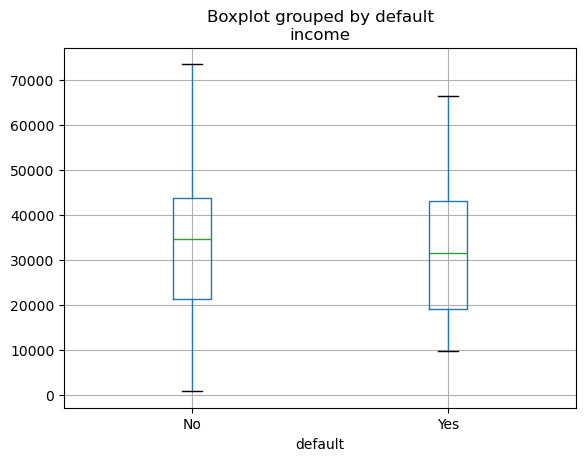

In [63]:
data.boxplot(column="income", by="default")

<Axes: title={'center': 'balance'}, xlabel='default'>

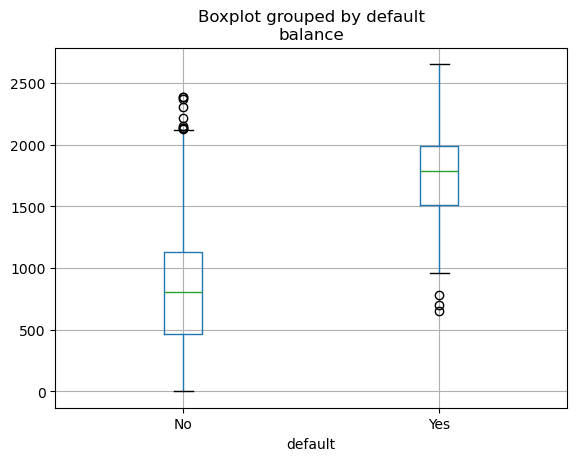

In [64]:
data.boxplot(column="balance", by="default")

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Axes: xlabel='balance', ylabel='income'>

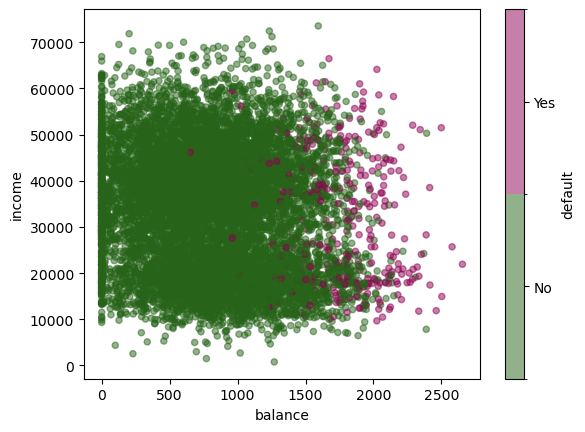

In [65]:
data.plot.scatter(
    x="balance",
    y="income",
    c="default",
    colormap="PiYG_r",
    alpha=0.5
)

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [66]:
y = data["default"] == "Yes"
x = data["balance"]

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

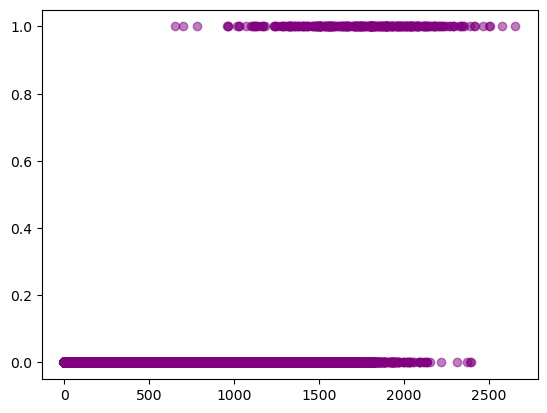

In [67]:
import matplotlib.pyplot as plt
plt.scatter(data["balance"], (data["default"] == "Yes").astype(int), alpha=0.5, color="purple")

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
x = data[["balance"]]               
y = (data["default"] == "Yes").astype(int)

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(x,y)

LogisticRegression()

In [72]:
lr.intercept_

array([-10.65132824])

In [73]:
lr.coef_

array([[0.00549892]])

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [74]:
import numpy as np
b0 = lr.intercept_
b1 = lr.coef_

In [75]:
balance = data["balance"].values  
p = 1 / (1 + np.exp(-(b0 + b1 * balance)))

In [76]:
p

array([[1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
        2.46651596e-03, 1.16759635e-01, 7.14476480e-05]])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [77]:
p_var = p * (1 - p)

In [78]:
p_var

array([[1.30397665e-03, 2.10813447e-03, 8.52087844e-03, ...,
        2.46043226e-03, 1.03126823e-01, 7.14425432e-05]])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [79]:
V = np.diagflat(p * (1 - p))

In [80]:
V

array([[1.30397665e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10813447e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52087844e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46043226e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03126823e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14425432e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [81]:
X = np.column_stack((np.ones(len(balance)), balance))
cov = np.linalg.inv(X.T @ V @ X)

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [82]:
se = np.sqrt(np.diag(cov))

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [84]:
b0_val = float(b0)         
b1_val = float(b1) 
betas = np.array([b0_val, b1_val])
z = betas / se

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20100\1810988640.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b0_val = float(b0)
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20100\1810988640.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1_val = float(b1)


Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [86]:
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Sí, la relación entre los factores (especialmente el balance) y la variable de respuesta (default) es significativa. Esto significa que el monto del balance influye de manera clara en la probabilidad de que una persona deje de pagar su crédito.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [88]:
x = (data["student"] == "Yes").astype(int).values.reshape(-1, 1)
y = (data["default"] == "Yes").astype(int)

In [89]:
from sklearn.linear_model import LogisticRegression

lr_student = LogisticRegression()
lr_student.fit(x, y)

b0 = lr_student.intercept_
b1 = lr_student.coef_

In [90]:
import numpy as np
p = 1 / (1 + np.exp(-(b0 + b1 * x)))

In [91]:
p_var = p * (1 - p)

In [92]:
V = np.diagflat(p * (1 - p))

In [93]:
X = np.column_stack((np.ones(len(x)), x))
cov = np.linalg.inv(X.T @ V @ X)

In [94]:
se = np.sqrt(np.diag(cov))

In [96]:
b0_val = float(b0)  
b1_val = float(b1) 
betas = np.array([b0_val, b1_val])
z = betas / se

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20100\1814097587.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b0_val = float(b0)
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20100\1814097587.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b1_val = float(b1)


In [97]:
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value

array([0.        , 0.00058452])

¿Son significativos?

Sí, la relación entre el factor student y la variable de respuesta default es significativa estadísticamente (p < 0.05).

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [103]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

X = data[["balance", "income"]].copy()
X["student"] = (data["student"] == "Yes").astype(int) 
y = (data["default"] == "Yes").astype(int)

lr_multi = LogisticRegression()
lr_multi.fit(X, y)

b0 = lr_multi.intercept_[0]
b1, b2, b3 = lr_multi.coef_[0]

In [109]:
b0, b1, b2, b3

(np.float64(-10.901790127296179),
 np.float64(0.005730595394888811),
 np.float64(3.961826653085865e-06),
 np.float64(-0.6125739237737495))

In [110]:
p = lr_multi.predict_proba(X)[:, 1]
V = np.diagflat(p * (1 - p))
X_mat = np.column_stack((np.ones(len(X)), X.values))
cov = np.linalg.inv(X_mat.T @ V @ X_mat)
se = np.sqrt(np.diag(cov))

In [111]:
betas = np.array([b0, b1, b2, b3])
z = betas / se
p_values = 2 * (1 - norm.cdf(abs(z)))

In [112]:
p_values

array([0.        , 0.        , 0.62934209, 0.00956064])

En el modelo de regresión logística múltiple, los factores balance y student son significativos para explicar la probabilidad de default.
En cambio, el income no muestra evidencia estadística suficiente (p > 0.05) para influir en el resultado.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

Te haces un examen para detectar una enfermedad, y el resultado dice que sí estás enfermo, pero en realidad no lo estás. Eso sería un falso positivo. Te preocuparías, gastarías dinero en más estudios o tratamientos innecesarios, y pasarías por mucho estrés sin razón. En cambio, si el resultado dijera que no tienes la enfermedad cuando en realidad sí la tienes (falso negativo), claro que también es malo, pero al menos no te habrían hecho pasar por todo ese proceso sin sentido. En este caso, un falso positivo es peor porque causa ansiedad y gastos innecesarios.

El banco tiene un sistema que detecta posibles fraudes. Si el sistema cree que tu compra es fraudulenta cuando en realidad tú la hiciste (falso positivo), te bloquean la tarjeta y no puedes pagar, aunque no hiciste nada malo. Eso es frustrante y molesto. En cambio, si el sistema deja pasar una compra rara que sí era fraude (falso negativo), el banco puede devolver el dinero o resolverlo después. Aquí, el falso positivo es peor porque afecta directamente al cliente y da una mala experiencia.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

Una prueba para detectar una enfermedad como el COVID. Si el resultado dice que no estás enfermo cuando en realidad sí lo estás (falso negativo), podrías salir, convivir con otros y contagiar a más personas sin saberlo. En cambio, si te da un falso positivo (te dice que sí estás enfermo cuando no lo estás), solo tendrías que aislarte unos días y luego comprobar que todo está bien. En este caso, el falso negativo es peor porque puede poner en riesgo la salud de muchas personas.

Tu coche tiene un sistema que detecta si hay una persona frente a ti para frenar automáticamente. Si el sistema no detecta a alguien cuando en realidad sí hay una persona (falso negativo), podrías atropellarla. En cambio, si el sistema cree que hay una persona y frena cuando no hay nadie (falso positivo), tal vez solo te dé un susto o incomodidad. Aquí, el falso negativo es mucho peor porque puede tener consecuencias graves, incluso fatales.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3